<a href="https://colab.research.google.com/github/vijaivimu/Python-For-Data-Science/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
scalar = torch.tensor(20)

In [3]:
scalar.ndim

0

In [4]:
scalar.shape

torch.Size([])

In [5]:
scalar.item()

20

In [6]:
list = [1,2,3,4,5]

In [7]:
vector = torch.tensor(list)

In [8]:
vector

tensor([1, 2, 3, 4, 5])

In [9]:
vector.shape

torch.Size([5])

In [10]:
vector.ndim

1

In [11]:
vector[0].item()

1

In [12]:
vector + 10

tensor([11, 12, 13, 14, 15])

In [13]:
matrix = torch.tensor([[1,2,3],[4,5,6]])

In [14]:
matrix.shape

torch.Size([2, 3])

In [15]:
matrix.ndim

2

In [16]:
tensor3d = torch.tensor([[[1,2,3],[4,5,6]],[[17,2,3],[18,5,6]]                                        ])

In [17]:
tensor3d.shape

torch.Size([2, 2, 3])

In [18]:
k= torch.rand((3,3,2))

In [19]:
k.shape

torch.Size([3, 3, 2])

In [20]:
k.ndim

3

In [21]:
k.size()

torch.Size([3, 3, 2])

In [22]:
tensordtyp = torch.tensor([1.0,2.0,3.0],dtype=torch.int16)

In [23]:
tensordtyp

tensor([1, 2, 3], dtype=torch.int16)

In [24]:
tensordtyp = torch.tensor([1.0,2.0,3.0],requires_grad=True)

In [25]:
tensordtyp = torch.tensor([1.0,2.0,3.0],requires_grad=True,device='cuda:0')

In [26]:
tensor1 = torch.rand((2,2))

In [27]:
tensor1 = tensor1.cuda()

In [28]:
tensor2 = torch.rand((2,2))


In [29]:
tensor1 + tensor2

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [30]:
tensor2 = tensor2.cuda()

In [31]:
tensor1 + tensor2

tensor([[0.7265, 1.1089],
        [1.0887, 0.8599]], device='cuda:0')

In [ ]:
tensor1.cpu() + tensor2.cpu()

In [ ]:
torch.matmul(tensor2, tensor1)

In [ ]:
tensor5 = torch.rand((2,2))

In [ ]:
tensor5 = tensor5.to(torch.int64)

In [ ]:
torch.matmul(tensor2, tensor5.cuda())

In [ ]:
print(tensor5.dtype)

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [36]:
x= torch.linspace(1,10,100).reshape(-1,1)

In [37]:
y= 2* x + 1 + torch.rand(x.size())

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x.numpy(),y.numpy(),test_size=0.2,random_state=25)

In [39]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

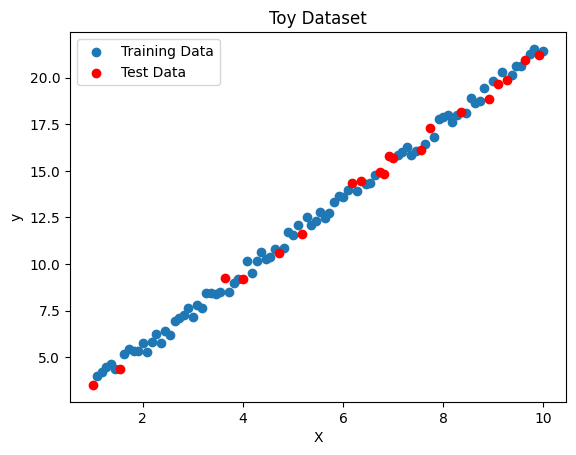

In [40]:
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.title('Toy Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [41]:
import torch.nn as nn
class LRModel(nn.Module):  # A robot that knows how to learn a straight-line rule
    def __init__(self, input_dim, output_dim):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # Creates the "straight-line rule"

    def forward(self, x):  # What the robot does when we give it some X
        out = self.linear(x)
        return out

input_dim = 1  # X has one column
output_dim = 1  # Y has one column
lr_model = LRModel(input_dim, output_dim)  # Our robot model

In [42]:
# Make predictions with the untrained model
with torch.no_grad():
    untrained_predictions = lr_model(x_test)

In [43]:
untrained_predictions

tensor([[-3.2494],
        [-2.5455],
        [-2.7801],
        [-4.6573],
        [-5.1852],
        [-1.1963],
        [-4.1880],
        [-6.0651],
        [-5.9478],
        [-6.5931],
        [-0.8443],
        [-4.5986],
        [-5.5958],
        [-5.0679],
        [-4.7159],
        [-6.1824],
        [-6.4171],
        [-4.5399],
        [-4.3053],
        [-3.5427]])

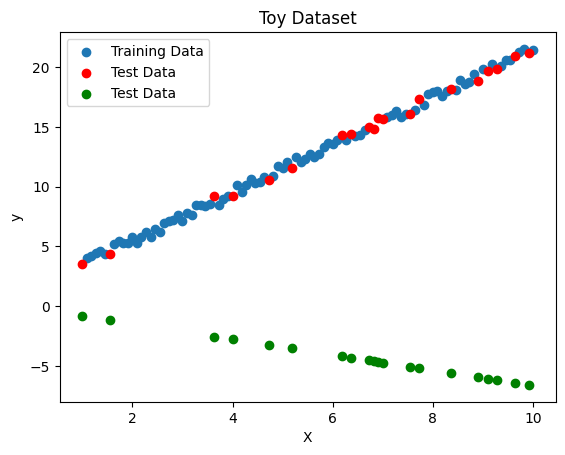

In [44]:
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.scatter(x_test.numpy(), untrained_predictions, label='Test Data', color='green')
plt.title('Toy Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
criterion = nn.MSELoss()

In [46]:
loss = criterion(untrained_predictions,y_test)

In [47]:
loss

tensor(401.7144)

In [48]:
import torch.optim as optim

In [49]:
optimizer = optim.SGD(lr_model.parameters(),lr=0.01)

In [52]:
num_epochs=100

loss_values = []

for epoch in range(num_epochs):
  lr_model.train()
  optimizer.zero_grad()
  output = lr_model(x_train)
  loss = criterion(output,y_train)
  loss.backward()
  optimizer.step()

  loss_values.append(loss.item())

  print('epoch',epoch, '::', loss.item())



epoch 0 :: 26.46065330505371
epoch 1 :: 2.7535252571105957
epoch 2 :: 0.6301937103271484
epoch 3 :: 0.437816321849823
epoch 4 :: 0.41820478439331055
epoch 5 :: 0.41406726837158203
epoch 6 :: 0.41133227944374084
epoch 7 :: 0.40874138474464417
epoch 8 :: 0.4061811566352844
epoch 9 :: 0.4036417007446289
epoch 10 :: 0.4011218547821045
epoch 11 :: 0.3986213207244873
epoch 12 :: 0.39613956212997437
epoch 13 :: 0.3936775326728821
epoch 14 :: 0.39123421907424927
epoch 15 :: 0.3888097107410431
epoch 16 :: 0.3864036202430725
epoch 17 :: 0.3840164542198181
epoch 18 :: 0.38164713978767395
epoch 19 :: 0.3792962431907654
epoch 20 :: 0.3769633173942566
epoch 21 :: 0.3746487498283386
epoch 22 :: 0.3723517060279846
epoch 23 :: 0.37007197737693787
epoch 24 :: 0.3678101599216461
epoch 25 :: 0.36556556820869446
epoch 26 :: 0.3633382022380829
epoch 27 :: 0.3611278533935547
epoch 28 :: 0.358934611082077
epoch 29 :: 0.35675859451293945
epoch 30 :: 0.3545990288257599
epoch 31 :: 0.35245615243911743
epoch 32 :

In [53]:
lr_model.eval()
# Make predictions with the untrained model
with torch.no_grad():
    predictions = lr_model(x_test)

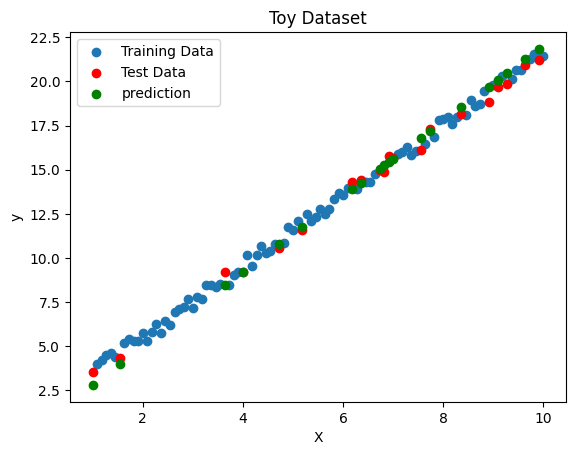

In [55]:
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.scatter(x_test.numpy(), predictions, label='prediction', color='green')
plt.title('Toy Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()